# Análise Exploratória sobre o ENADE 2017

[Link para download do dados](http://download.inep.gov.br/educacao_superior/indicadores/legislacao/2018/resultados_conceito_enade_2017.csv)

In [1]:
import numpy as np
import pandas as pd


In [2]:
conceito_ie = pd.read_csv('dados/resultados_conceito_enade_2017.csv')

In [3]:
conceito_ie.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 22 columns):
Ano                                 int64
Código da Área                      int64
Área de Avaliação                   object
Código da IES                       int64
Nome da IES                         object
Sigla da IES                        object
Organização Acadêmica               object
Categoria Administrativa            object
Código do Curso                     int64
Modalidade de Ensino                object
Código do Município                 int64
Município do Curso                  object
Sigla da UF                         object
Nº de Concluintes Inscritos         int64
Nº  de Concluintes Participantes    int64
Nota Bruta - FG                     object
Nota Padronizada - FG               object
Nota Bruta - CE                     object
Nota Padronizada - CE               object
Conceito Enade (Contínuo)           object
Conceito Enade (Faixa)              ob

In [4]:
conceito_ie.isnull().sum()

Ano                                     0
Código da Área                          0
Área de Avaliação                       0
Código da IES                           0
Nome da IES                             0
Sigla da IES                          651
Organização Acadêmica                   0
Categoria Administrativa                0
Código do Curso                         0
Modalidade de Ensino                    0
Código do Município                     0
Município do Curso                      0
Sigla da UF                             0
Nº de Concluintes Inscritos             0
Nº  de Concluintes Participantes        0
Nota Bruta - FG                       195
Nota Padronizada - FG                 360
Nota Bruta - CE                       195
Nota Padronizada - CE                 360
Conceito Enade (Contínuo)             360
Conceito Enade (Faixa)                  0
Observação                          10542
dtype: int64

In [41]:
# Substituir o separador decimal ',' por '.' 
f = lambda x : (x.replace(',', '.'))
# Carregando o datafram
conceito_ie = pd.read_csv('dados/resultados_conceito_enade_2017.csv')
#    converters={'Conceito Enade (Contínuo)':f})

In [42]:
# Criando um novo dataframe a partir das colunas selecionadas
conceitos = conceito_ie[['Código da Área', 
                      'Área de Avaliação',
                      'Nome da IES',
                      'Sigla da IES',
                      'Categoria Administrativa',
                      'Sigla da UF',
                      'Conceito Enade (Faixa)']]
# Renomeando as colunas
conceitos.columns = ['cod_area', 'area_avaliacao', 'nome_ie', 'sigla_ie', 'categoria_adm', 'sigla_uf', 'conceito']
# Visualizando as primeiras linhas do dataframe resultante

In [43]:

# Separando apenas as respostas dos alunos das IES do nordeste
uf_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
conceito_ccc_nordeste = pd.DataFrame()
for uf in uf_nordeste:
    temp = conceitos[conceitos['sigla_uf'] == uf]
    conceito_ccc_nordeste = pd.concat([conceito_ccc_nordeste, temp])
conceito_ccc_nordeste = conceito_ccc_nordeste.reset_index()

In [57]:
# Filtrando as universidades publicas federais e privadas com fins lucrativos
pubpriv = conceito_ccc_nordeste[(conceito_ccc_nordeste['categoria_adm'] == 'Privada') | (conceito_ccc_nordeste['categoria_adm'] == 'Publica')]
# Visualizando o dataframe

pubpriv = pubpriv[pubpriv['conceito'] != 'SC']

publicas = pubpriv[pubpriv['categoria_adm'] == 'Publica'][:400]
privadas = pubpriv[pubpriv['categoria_adm'] == 'Privada'][:400]



In [58]:
categoria_adm = pubpriv['categoria_adm'].value_counts()
categoria_adm

Publica    752
Privada    447
Name: categoria_adm, dtype: int64

In [59]:
pubpriv['conceito'] = pubpriv['conceito'].astype(int)

In [60]:
pubpriv['categoria_adm'].value_counts(normalize=True)[0]

0.6271893244370309

In [61]:
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas necessárias para plotar as vizualizações
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Definir o tamanho e a resolução em DPI(Dots Per Inch) das figuras plotadas.
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':100})
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')


In [62]:
categoria_adm = pubpriv['categoria_adm'].value_counts()
categoria_adm

Publica    752
Privada    447
Name: categoria_adm, dtype: int64

TypeError: can't multiply sequence by non-int of type 'float'

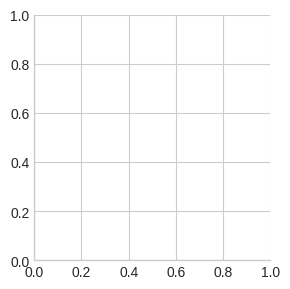

In [63]:
fig = sns.FacetGrid(publicas, col='categoria_adm', hue='categoria_adm')
fig.map(sns.distplot, 'conceito', kde=False, hist_kws={'alpha': .8})
fig.add_legend()
plt.show()

## EDA

In [28]:
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

ImportError: No module named matplotlib.pyplot

In [29]:
# Convertendo a coluna 'CONCEITO_ENADA' para inteiro
conceito_ccc_nordeste['CONCEITO_ENADE'] = conceito_ccc_nordeste['CONCEITO_ENADE'].astype('int')

NameError: name 'conceito_ccc_nordeste' is not defined

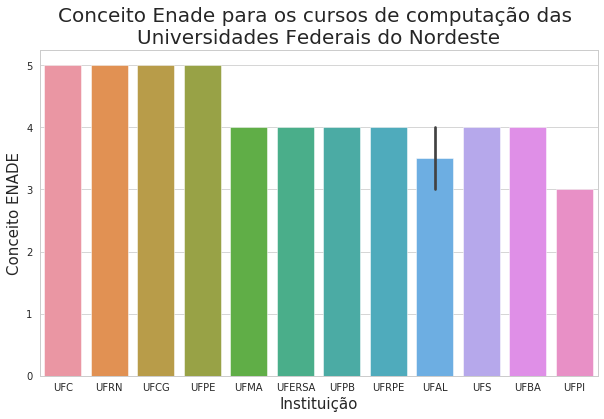